## Penguins Species Classification

This project uses penguin dataset available at this [page](https://pythonforbiologists.com/machine-learning-for-biology-part-one.html). 
The objective of this project is to answer specific bioinformatic questions then later perform prediction using machine learning algorithmn



### Projects steps
1. Importing relevant libraries and loading the dataset
2. Data Exploration 
3. Visualize to answer research questions
4. Supervised Machine Learning Modelling 

In [1]:
# Importing data processing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
penguine_df = pd.read_csv('penguins.csv')
penguine_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Descriotive statistics
penguine_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
# Understanding the data variables
penguine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguine_df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [47]:
penguine_df.fillna(penguine_df.mean(), inplace=True)
#penguine_df.isnull().sum()

In [45]:
penguine_df['sex']=penguine_df['sex'].replace('.','MALE')

In [46]:
penguine_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

3. How is the data distributed in numerical columns?

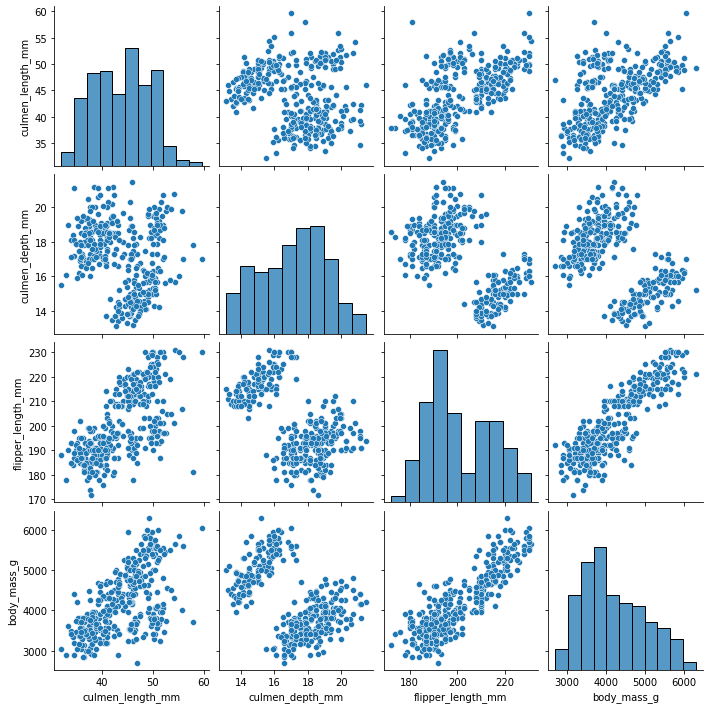

In [11]:
# Understanding the data distribution in numerical columns
import seaborn as sns
p=sns.pairplot(penguine_df)

4. Data distribution in sex column

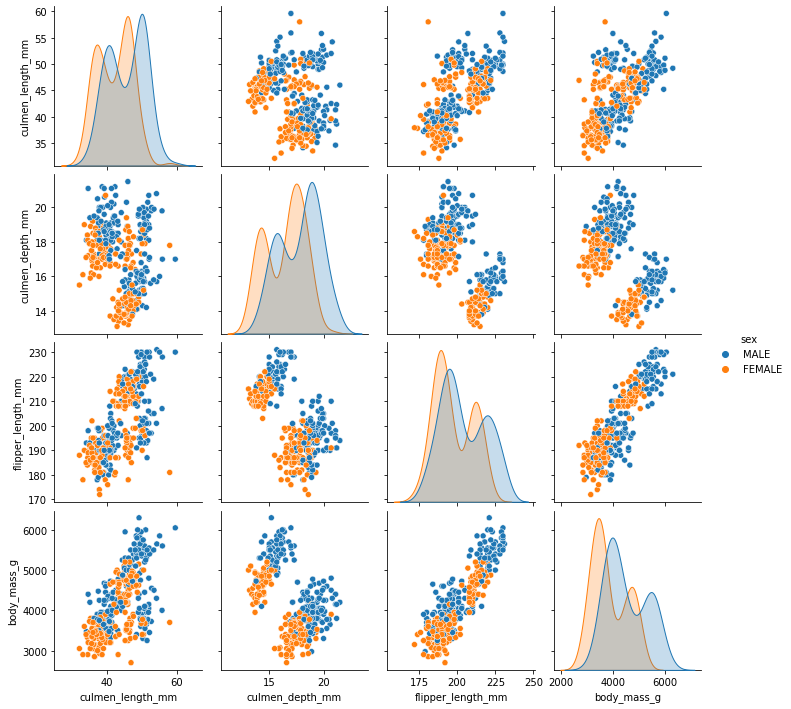

In [12]:
# Pairplot helps to visualize the distribution of each class in the categorical Variable
sns.pairplot(penguine_df, hue="sex")

5. Data distribution in the species column

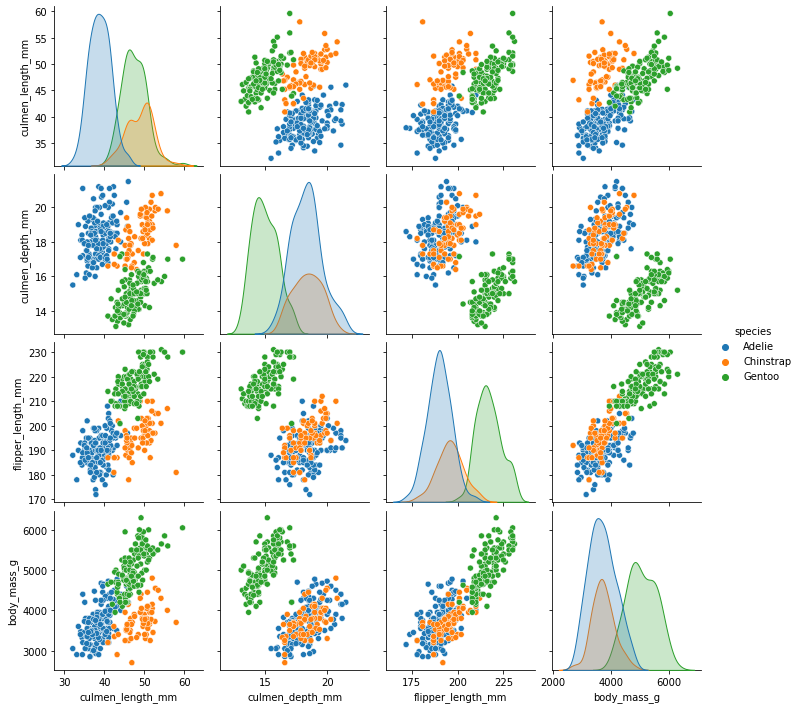

In [13]:
sns.pairplot(penguine_df, hue="species")

5. How many unique species do we have in the dataset

In [14]:
# Understanding the 
penguine_df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

6. Let's see the correlation of columns with each other

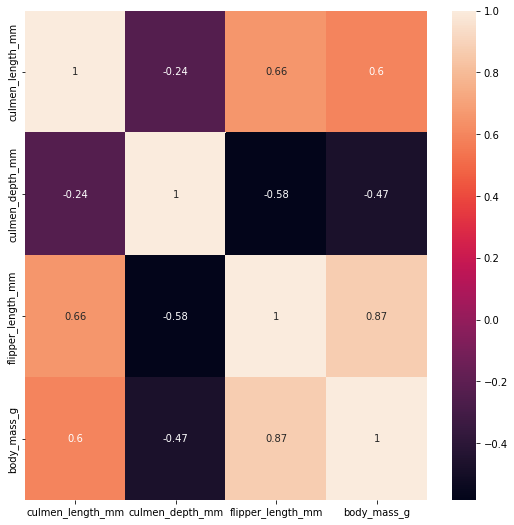

In [48]:
plt.figure(figsize=(9,9))
sns.heatmap(penguine_df.corr(),annot=True)

7. Do we have any outlier in our dataset?

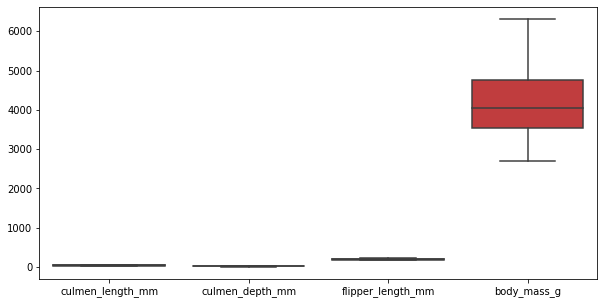

In [16]:
# Outlier detection 
plt.figure(figsize=(10,5))
sns.boxplot(data=penguine_df)

In [17]:
# Data scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [18]:
for i in penguine_df.columns:
    if(penguine_df[i].dtype=='float64'):
        a=np.asarray(penguine_df[i])
        a=a.reshape(-1, 1) 
        penguine_df[i]=sc.fit_transform(a)

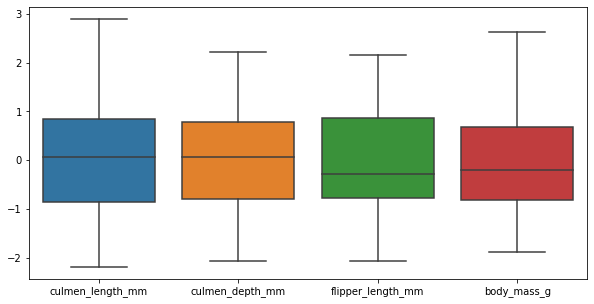

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=penguine_df)

8. How many unique values are in island column

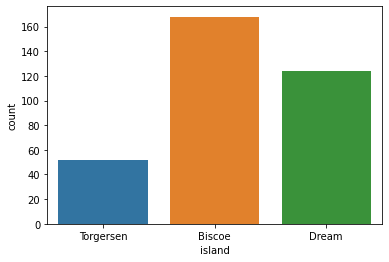

In [20]:
sns.countplot(x='island',data=penguine_df)

From the above we can see that Torgersen has less amount on penguins due to habitat of single species.

In [21]:
penguine_df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

9. What is the population of penguins in the island?

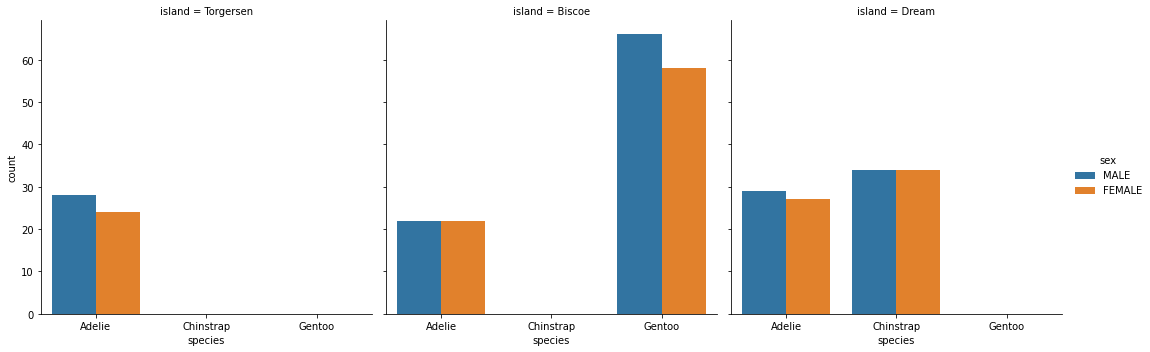

In [22]:
# Population of penguins by gender on each island
sns.catplot(x="species", hue="sex", col="island",data=penguine_df, kind="count") 

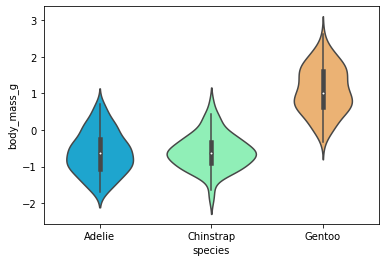

In [23]:
# Analysis on structure of penguins
sns.violinplot(x="species", y="body_mass_g", data=penguine_df,palette='rainbow')

From the above plot we can see tha Gentoo Penguins are slightly heavier also compared to others.

Text(0, 0.5, 'body mass')

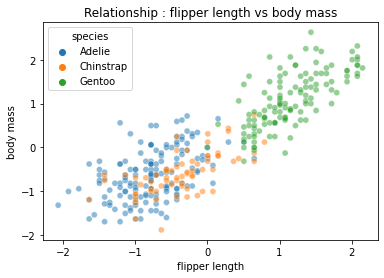

In [24]:
# What's the relationship between flipper length and body mass
sns.scatterplot(data = penguine_df , x = 'flipper_length_mm' , y = 'body_mass_g' , hue = 'species' , alpha = 0.5 )
plt.title("Relationship : flipper length vs body mass")
plt.xlabel("flipper length")
plt.ylabel("body mass")

As the graph displays, it seems that flipper length and body mass has positive correlation. In this graph, use diffenrent colors to display different species. As the result, it sseems that gentoo is the largest specie.

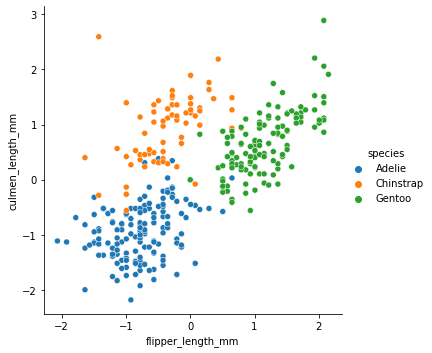

In [25]:
# 
sns.relplot(data=penguine_df,x="flipper_length_mm",y="culmen_length_mm", hue="species")

From the plot above, Adelie looks small in size comparing with other species.

From above plot we can see that,

1.In case of culmen length, Adelie is easily seperable/distinguishable.

2.In case of culmen depth, flipper length and body mass, Gentoo is easily seperable/distinguishable

In [28]:
# Project Implemantation guide https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081

### Computational Modelling (*Supervised Machine Learning Modelling*) 
At this stage, Our challenge will be to classify. This will use supervised machine learning algorith for classification purpose. The classification algorithmn we develop here will help use to accuratly separate closely related species that are hard to distinguish, but easy to measure. 

The advantage of our classification algorithm will help us in that we will be able to deliver a product useful to non-technical, and expert teams to use in data, like to gather the measurements, then figure out the matching species later on.

In [49]:
# Classification
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 

In [50]:
SVC = svm
dt  = DecisionTreeClassifier
kn = KNeighborsClassifier
lr = LogisticRegression

In [51]:
train, test = train_test_split(penguine_df, test_size = 0.3)
print(train.shape)
print(test.shape)

(240, 7)
(104, 7)


In [52]:
train_X = train[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
train_Y = train.species

test_x= test[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']] 
test_y =test.species 

In [53]:
model = svm.SVC()
model.fit(train_X,train_Y)

prediction = model.predict(test_x)
print('The accuracy of the SVM is:')
print(metrics.classification_report(test_y, prediction))


The accuracy of the SVM is:
              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        45
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104



In [54]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_x)
print('Decision Tree accuracy')
print(metrics.classification_report(test_y, prediction))


Decision Tree accuracy
              precision    recall  f1-score   support

      Adelie       1.00      0.91      0.95        45
   Chinstrap       0.86      1.00      0.92        18
      Gentoo       0.98      1.00      0.99        41

    accuracy                           0.96       104
   macro avg       0.94      0.97      0.95       104
weighted avg       0.97      0.96      0.96       104



In [55]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_X,train_Y)
prediction=model.predict(test_x)
print('KNeighbor accuracy is:')
print(metrics.classification_report(test_y, prediction))


KNeighbor accuracy is:
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        45
   Chinstrap       1.00      0.89      0.94        18
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.98       104
   macro avg       0.99      0.96      0.97       104
weighted avg       0.98      0.98      0.98       104



In [56]:
train_X_c,test_x_c=train_test_split(penguine_df,test_size=0.3,random_state=0)
train_X_c = train[['flipper_length_mm','body_mass_g']]
train_Y_c = train.species


test_x_c= test[['flipper_length_mm','body_mass_g']] 
test_y_c =test.species 

In [57]:
model=svm.SVC()
model.fit(train_X_c,train_Y_c) 
prediction=model.predict(test_x_c) 
print('The accuracy of the SVM:',metrics.accuracy_score(test_y_c, prediction))

The accuracy of the SVM: 0.7884615384615384


In [58]:
model = LogisticRegression()
model.fit(train_X_c,train_Y_c) 
prediction=model.predict(test_x_c) 
print('The accuracy of LogisticRegression is:',metrics.accuracy_score(test_y_c, prediction))

The accuracy of LogisticRegression is: 0.7884615384615384


In [59]:
model=KNeighborsClassifier(n_neighbors=7) 
model.fit(train_X_c,train_Y_c) 
prediction=model.predict(test_x_c) 
print('The accuracy of KNNeighbors:',metrics.accuracy_score(test_y_c, prediction))

The accuracy of KNNeighbors: 0.8076923076923077


In [60]:
model=DecisionTreeClassifier()
model.fit(train_X_c,train_Y_c) 
prediction=model.predict(test_x_c) 
print('The accuracy of Decision Tree:',metrics.accuracy_score(test_y_c, prediction))


The accuracy of Decision Tree: 0.7884615384615384


###    Congratulations 

------------------------------

This was a successful implementation of BioInformatic Project of Interest